# Exploration 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class N_k_Queen:
    def __init__(self, n, k):
        self.n = n
        self.k = k
        
    def _sub_solve(self, rows, pointer=0, cols=set(), diags=set(), anti_diags=set()):
        if pointer == self.k: return 1
        
        result = 0
        
        row = rows[pointer]
        for col in range(self.n):
            if col in cols or row+col in diags or row-col in anti_diags: continue
            
            cols.add(col)
            diags.add(row+col)
            anti_diags.add(row-col)
            
            result += self._sub_solve(rows, pointer+1, cols, diags, anti_diags)
            
            cols.remove(col)
            diags.remove(row+col)
            anti_diags.remove(row-col)
            
        return result
    
    def solve(self):
        rows = self._generate_rows()
        
        result = 0
        
        for row in rows:
            result += self._sub_solve(row)
            
        return result
        
    
    # N choose k rows
    def _generate_rows(self):
        rows = []
        for i in range(2**self.n):
            if sum(int(v) for v in bin(i)[2:]) != self.k: continue
            
            row = []
            for idx in range(self.n):
                if i & (1 << idx): row.append(idx)
            
            rows.append(row)
            
        return rows

In [4]:
N_k_Queen(5,3).solve()

204

In [3]:
def analytic_2q(n):
    return 1/2 * n**4 - 5/3 * n**3 + 3/2 * n**2 - n/3

In [4]:
analytic_2q(8)

1287.9999999999998

In [5]:
solver = N_k_Queen(8,2)
solver.solve()

1288

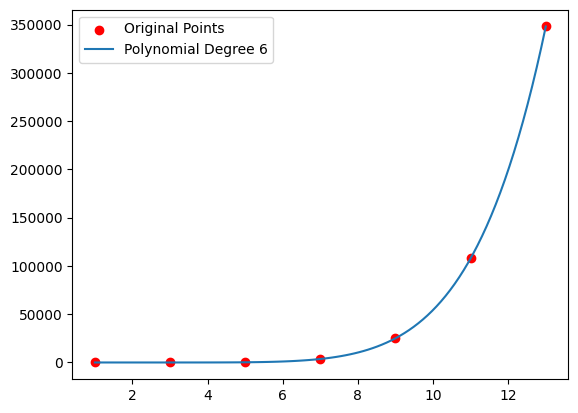

In [6]:
k = 3
r = list(range(1,15,2))
x = np.array(r)
y = []
for n in r:
    solver = N_k_Queen(n,k)
    y.append(solver.solve())
y = np.array(y)
    
degree = len(r)-1

coefficients = np.polyfit(x, y, degree)

polynomial = np.poly1d(coefficients)

x_axis = np.linspace(min(x), max(x), 100)
y_axis = polynomial(x_axis)

plt.scatter(x, y, color='red', label='Original Points')
# Plot the polynomial
plt.plot(x_axis, y_axis, label=f'Polynomial Degree {degree}')
plt.legend()
plt.show()

In [7]:
12 * polynomial

poly1d([   2.        ,  -20.        ,   79.        , -150.        ,
        131.99999999,  -45.99999999,    3.        ])

In [8]:
r

[1, 3, 5, 7, 9, 11, 13]

In [9]:
polynomial

poly1d([  0.16666667,  -1.66666667,   6.58333333, -12.5       ,
        11.        ,  -3.83333333,   0.25      ])

In [10]:
# Works for odd N
Q3 = lambda n: (n-1)*(n-3)*(2*n**4 - 12*n**3 + 25*n**2 - 14*n + 1)/12
[(N, N_k_Queen(N, 3).solve(), Q3(N)) for N in range(1, 12)]

[(1, 0, 0.0),
 (2, 0, -0.75),
 (3, 0, 0.0),
 (4, 24, 22.25),
 (5, 204, 204.0),
 (6, 1024, 1021.25),
 (7, 3628, 3628.0),
 (8, 10320, 10316.25),
 (9, 25096, 25096.0),
 (10, 54400, 54395.25),
 (11, 107880, 107880.0)]

In [11]:
f = lambda n: 2*n**4 - 12*n**3 + 25*n**2 - 14*n + 1
f(2)

9

In [12]:
import sympy as sp
n = sp.Symbol("n")
Q2 = sp.S(1)/6 * n * (n - 1) * (n - 2) * (3*n - 1)
Q2

n*(n - 2)*(n - 1)*(3*n - 1)/6

In [13]:
# Inductive step
(Q2.subs({n: n-1}) + 2 * (n-1) * ((n-1)**2 - (n-1) - (n-2)) + (n-1)**2 - (n-1) + (n-1)*(n-2)).expand()

n**4/2 - 5*n**3/3 + 3*n**2/2 - n/3

In [14]:
Q2.expand()

n**4/2 - 5*n**3/3 + 3*n**2/2 - n/3

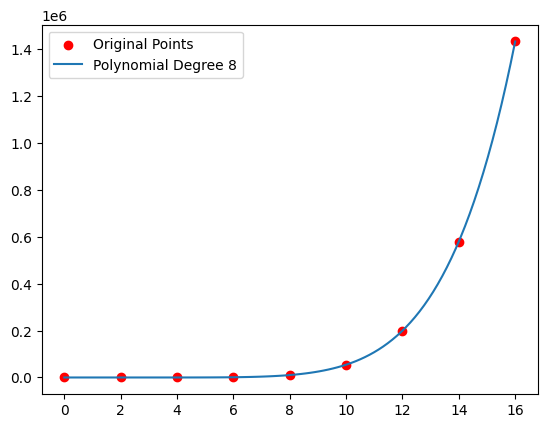

In [15]:
k = 3
r = list(range(0,18,2))
x = np.array(r)
y = []
for n in r:
    solver = N_k_Queen(n,k)
    y.append(solver.solve())
y = np.array(y)
    
degree = len(r)-1

coefficients = np.polyfit(x, y, degree)

polynomial = np.poly1d(coefficients)

x_axis = np.linspace(min(x), max(x), 100)
y_axis = polynomial(x_axis)

plt.scatter(x, y, color='red', label='Original Points')
# Plot the polynomial
plt.plot(x_axis, y_axis, label=f'Polynomial Degree {degree}')
plt.legend()
plt.show()

In [16]:
60 * polynomial

poly1d([-5.10700366e-14,  3.25786745e-12,  1.00000000e+01, -1.00000000e+02,
        3.95000000e+02, -7.50000000e+02,  6.60000000e+02, -2.00000000e+02,
       -5.59392859e-09])

In [17]:
Q3(sp.Symbol("n")).expand()

n**6/6 - 5*n**5/3 + 79*n**4/12 - 25*n**3/2 + 11*n**2 - 23*n/6 + 1/4

In [18]:
Q3(sp.Symbol("n")).expand() * 6

n**6 - 10*n**5 + 79*n**4/2 - 75*n**3 + 66*n**2 - 23*n + 3/2

In [19]:
Q2.expand() * 2

n**4 - 10*n**3/3 + 3*n**2 - 2*n/3

# Exploration 2

In [20]:
import sympy as sp
from IPython.display import display

In [36]:
def stirling_first_kind(n, k):
    # Base cases
    if n == k == 0:
        return 1
    if n == 0 or k == 0 or k > n:
        return 0
    return stirling_first_kind(n-1, k-1) - (n-1) * stirling_first_kind(n-1, k)

In [21]:
x,n,i = sp.symbols("x n i")
x,n,i

(x, n, i)

In [59]:
for N in range(1,10):
    print(100*"-")
    print(N)
    display(sp.expand(sp.product((x + i), (i,1,N))))
    display(sum((-1)**(N-k) * stirling_first_kind(N+1,k+1)*x**k for k in range(N+1)))

----------------------------------------------------------------------------------------------------
1


x + 1

x + 1

----------------------------------------------------------------------------------------------------
2


x**2 + 3*x + 2

x**2 + 3*x + 2

----------------------------------------------------------------------------------------------------
3


x**3 + 6*x**2 + 11*x + 6

x**3 + 6*x**2 + 11*x + 6

----------------------------------------------------------------------------------------------------
4


x**4 + 10*x**3 + 35*x**2 + 50*x + 24

x**4 + 10*x**3 + 35*x**2 + 50*x + 24

----------------------------------------------------------------------------------------------------
5


x**5 + 15*x**4 + 85*x**3 + 225*x**2 + 274*x + 120

x**5 + 15*x**4 + 85*x**3 + 225*x**2 + 274*x + 120

----------------------------------------------------------------------------------------------------
6


x**6 + 21*x**5 + 175*x**4 + 735*x**3 + 1624*x**2 + 1764*x + 720

x**6 + 21*x**5 + 175*x**4 + 735*x**3 + 1624*x**2 + 1764*x + 720

----------------------------------------------------------------------------------------------------
7


x**7 + 28*x**6 + 322*x**5 + 1960*x**4 + 6769*x**3 + 13132*x**2 + 13068*x + 5040

x**7 + 28*x**6 + 322*x**5 + 1960*x**4 + 6769*x**3 + 13132*x**2 + 13068*x + 5040

----------------------------------------------------------------------------------------------------
8


x**8 + 36*x**7 + 546*x**6 + 4536*x**5 + 22449*x**4 + 67284*x**3 + 118124*x**2 + 109584*x + 40320

x**8 + 36*x**7 + 546*x**6 + 4536*x**5 + 22449*x**4 + 67284*x**3 + 118124*x**2 + 109584*x + 40320

----------------------------------------------------------------------------------------------------
9


x**9 + 45*x**8 + 870*x**7 + 9450*x**6 + 63273*x**5 + 269325*x**4 + 723680*x**3 + 1172700*x**2 + 1026576*x + 362880

x**9 + 45*x**8 + 870*x**7 + 9450*x**6 + 63273*x**5 + 269325*x**4 + 723680*x**3 + 1172700*x**2 + 1026576*x + 362880

In [51]:
for N in range(1,10):
    print(100*"-")
    print(N)
    display(sp.expand(sp.product((x - i), (i,1,N))))
    print(list(reversed([(stirling_first_kind(N+1,k), (N+1,k)) for k in range(1,N+2)])))
    display(sum(stirling_first_kind(N+1,k+1)*x**(k) for k in range(N+1)))

----------------------------------------------------------------------------------------------------
1


x - 1

[(1, (2, 2)), (-1, (2, 1))]


x - 1

----------------------------------------------------------------------------------------------------
2


x**2 - 3*x + 2

[(1, (3, 3)), (-3, (3, 2)), (2, (3, 1))]


x**2 - 3*x + 2

----------------------------------------------------------------------------------------------------
3


x**3 - 6*x**2 + 11*x - 6

[(1, (4, 4)), (-6, (4, 3)), (11, (4, 2)), (-6, (4, 1))]


x**3 - 6*x**2 + 11*x - 6

----------------------------------------------------------------------------------------------------
4


x**4 - 10*x**3 + 35*x**2 - 50*x + 24

[(1, (5, 5)), (-10, (5, 4)), (35, (5, 3)), (-50, (5, 2)), (24, (5, 1))]


x**4 - 10*x**3 + 35*x**2 - 50*x + 24

----------------------------------------------------------------------------------------------------
5


x**5 - 15*x**4 + 85*x**3 - 225*x**2 + 274*x - 120

[(1, (6, 6)), (-15, (6, 5)), (85, (6, 4)), (-225, (6, 3)), (274, (6, 2)), (-120, (6, 1))]


x**5 - 15*x**4 + 85*x**3 - 225*x**2 + 274*x - 120

----------------------------------------------------------------------------------------------------
6


x**6 - 21*x**5 + 175*x**4 - 735*x**3 + 1624*x**2 - 1764*x + 720

[(1, (7, 7)), (-21, (7, 6)), (175, (7, 5)), (-735, (7, 4)), (1624, (7, 3)), (-1764, (7, 2)), (720, (7, 1))]


x**6 - 21*x**5 + 175*x**4 - 735*x**3 + 1624*x**2 - 1764*x + 720

----------------------------------------------------------------------------------------------------
7


x**7 - 28*x**6 + 322*x**5 - 1960*x**4 + 6769*x**3 - 13132*x**2 + 13068*x - 5040

[(1, (8, 8)), (-28, (8, 7)), (322, (8, 6)), (-1960, (8, 5)), (6769, (8, 4)), (-13132, (8, 3)), (13068, (8, 2)), (-5040, (8, 1))]


x**7 - 28*x**6 + 322*x**5 - 1960*x**4 + 6769*x**3 - 13132*x**2 + 13068*x - 5040

----------------------------------------------------------------------------------------------------
8


x**8 - 36*x**7 + 546*x**6 - 4536*x**5 + 22449*x**4 - 67284*x**3 + 118124*x**2 - 109584*x + 40320

[(1, (9, 9)), (-36, (9, 8)), (546, (9, 7)), (-4536, (9, 6)), (22449, (9, 5)), (-67284, (9, 4)), (118124, (9, 3)), (-109584, (9, 2)), (40320, (9, 1))]


x**8 - 36*x**7 + 546*x**6 - 4536*x**5 + 22449*x**4 - 67284*x**3 + 118124*x**2 - 109584*x + 40320

----------------------------------------------------------------------------------------------------
9


x**9 - 45*x**8 + 870*x**7 - 9450*x**6 + 63273*x**5 - 269325*x**4 + 723680*x**3 - 1172700*x**2 + 1026576*x - 362880

[(1, (10, 10)), (-45, (10, 9)), (870, (10, 8)), (-9450, (10, 7)), (63273, (10, 6)), (-269325, (10, 5)), (723680, (10, 4)), (-1172700, (10, 3)), (1026576, (10, 2)), (-362880, (10, 1))]


x**9 - 45*x**8 + 870*x**7 - 9450*x**6 + 63273*x**5 - 269325*x**4 + 723680*x**3 - 1172700*x**2 + 1026576*x - 362880

The coefficients of $x^k$ are exactly the stirling numbers of the first kind $s(n, k-1)$, should be relatively straightforward to prove inductively (see wiki for recursion and compare with obvious recursion from definition).

In [68]:
def calc_ak(N,k):
    return stirling_first_kind(N+1,k+1)

def calc_bk(N,k):
    return (-sp.S(1))**(N-k) * stirling_first_kind(N+1,k+1)

def calc_cs(N, s):
    return sum(calc_ak(N, k) * calc_bk(N, s-k) for k in range(s+1))

for N in range(1,10):
    print(100*"-")
    print(N)
    display(sp.expand(sp.product((x - i) * (x + i), (i,1,N))))
    display(sum(calc_cs(N,k)*x**(k) for k in range(2*N+1)))

----------------------------------------------------------------------------------------------------
1


x**2 - 1

x**2 - 1

----------------------------------------------------------------------------------------------------
2


x**4 - 5*x**2 + 4

x**4 - 5*x**2 + 4

----------------------------------------------------------------------------------------------------
3


x**6 - 14*x**4 + 49*x**2 - 36

x**6 - 14*x**4 + 49*x**2 - 36

----------------------------------------------------------------------------------------------------
4


x**8 - 30*x**6 + 273*x**4 - 820*x**2 + 576

x**8 - 30*x**6 + 273*x**4 - 820*x**2 + 576

----------------------------------------------------------------------------------------------------
5


x**10 - 55*x**8 + 1023*x**6 - 7645*x**4 + 21076*x**2 - 14400

x**10 - 55*x**8 + 1023*x**6 - 7645*x**4 + 21076*x**2 - 14400

----------------------------------------------------------------------------------------------------
6


x**12 - 91*x**10 + 3003*x**8 - 44473*x**6 + 296296*x**4 - 773136*x**2 + 518400

x**12 - 91*x**10 + 3003*x**8 - 44473*x**6 + 296296*x**4 - 773136*x**2 + 518400

----------------------------------------------------------------------------------------------------
7


x**14 - 140*x**12 + 7462*x**10 - 191620*x**8 + 2475473*x**6 - 15291640*x**4 + 38402064*x**2 - 25401600

x**14 - 140*x**12 + 7462*x**10 - 191620*x**8 + 2475473*x**6 - 15291640*x**4 + 38402064*x**2 - 25401600

----------------------------------------------------------------------------------------------------
8


x**16 - 204*x**14 + 16422*x**12 - 669188*x**10 + 14739153*x**8 - 173721912*x**6 + 1017067024*x**4 - 2483133696*x**2 + 1625702400

x**16 - 204*x**14 + 16422*x**12 - 669188*x**10 + 14739153*x**8 - 173721912*x**6 + 1017067024*x**4 - 2483133696*x**2 + 1625702400

----------------------------------------------------------------------------------------------------
9


x**18 - 285*x**16 + 32946*x**14 - 1999370*x**12 + 68943381*x**10 - 1367593305*x**8 + 15088541896*x**6 - 84865562640*x**4 + 202759531776*x**2 - 131681894400

x**18 - 285*x**16 + 32946*x**14 - 1999370*x**12 + 68943381*x**10 - 1367593305*x**8 + 15088541896*x**6 - 84865562640*x**4 + 202759531776*x**2 - 131681894400

# Exploration 3

In [23]:
I = lambda a,b: int(a == b)
I(1,2), I(1,1)

(0, 1)

In [24]:
I_inv = lambda a,b: 1 - I(a,b)
I_inv(1,2), I_inv(1,1)

(1, 0)

### Naive summation method

In [25]:
import itertools

In [26]:
factorial = lambda n: 1 if n <= 1 else n * factorial(n-1)
factorial(5)

120

In [27]:
n = 5
two_sum = list(itertools.product(*[range(n) for _ in range(2)]))

def Q_kn(k):    
    count = 0
    for combi in itertools.product(*[two_sum for _ in range(k)]):
        P = 1
        for r in range(len(combi)):
            for s in range(r+1, len(combi)):
                P *= I_inv(combi[r][0], combi[s][0]) * I_inv(combi[r][1], combi[s][1]) * I_inv(combi[r][1] - combi[r][0], combi[s][1] - combi[s][0]) * I_inv(combi[r][1] + combi[r][0], combi[s][1] + combi[s][0])
        count += P
                    
    return count/factorial(k)

Q_kn(2), Q_kn(3), N_k_Queen(n, 2).solve(), N_k_Queen(n, 3).solve()

(140.0, 204.0, 140, 204)

### A little less naive

In [28]:
def Qn_naive(n):
    total_S = list(itertools.product(*[list(range(n)) for _ in range(n)]))
#     print(total_S)
    
    count = 0
    for combi in total_S:
        P = 1
        for km1 in range(len(combi)):
            for lm1 in range(km1+1, len(combi)):
                P *= I_inv(combi[km1], combi[lm1]) * I_inv(combi[km1] - km1, combi[lm1] - lm1) * I_inv(combi[km1] + km1, combi[lm1] + lm1)
        count += P
        
    return count

Qn_naive(6)

4

### Exploration

In [29]:
a = sp.Symbol("a")
for N in range(1,4):
    v = [None] + [sp.Symbol(f"j{i}") for i in range(1,N+1)]
    expression = sp.S(1)
    
    for k in range(1,N):
        for l in range(k+1,N+1):
            expression *= (1 - sp.exp(v[k] - v[l])) * (1 - sp.exp(v[k] - v[l] - k + l)) * (1 - sp.exp(v[k] - v[l] + k - l))
    
    print("-"*100)
    display(sp.expand(expression))

----------------------------------------------------------------------------------------------------


1

----------------------------------------------------------------------------------------------------


-exp(3*j1)*exp(-3*j2) + exp(-1)*exp(2*j1)*exp(-2*j2) + exp(2*j1)*exp(-2*j2) + E*exp(2*j1)*exp(-2*j2) - E*exp(j1)*exp(-j2) - exp(j1)*exp(-j2) - exp(-1)*exp(j1)*exp(-j2) + 1

----------------------------------------------------------------------------------------------------


-exp(6*j1)*exp(-6*j3) + exp(-1)*exp(6*j1)*exp(-j2)*exp(-5*j3) + exp(6*j1)*exp(-j2)*exp(-5*j3) + E*exp(6*j1)*exp(-j2)*exp(-5*j3) - E*exp(6*j1)*exp(-2*j2)*exp(-4*j3) - exp(6*j1)*exp(-2*j2)*exp(-4*j3) - exp(-1)*exp(6*j1)*exp(-2*j2)*exp(-4*j3) + exp(6*j1)*exp(-3*j2)*exp(-3*j3) + exp(-1)*exp(5*j1)*exp(j2)*exp(-6*j3) + exp(5*j1)*exp(j2)*exp(-6*j3) + E*exp(5*j1)*exp(j2)*exp(-6*j3) - 2*E*exp(5*j1)*exp(-5*j3) - 2*exp(5*j1)*exp(-5*j3) - 2*exp(-1)*exp(5*j1)*exp(-5*j3) - exp(3)*exp(5*j1)*exp(-j2)*exp(-4*j3) - exp(-3)*exp(5*j1)*exp(-j2)*exp(-4*j3) + 2*exp(5*j1)*exp(-j2)*exp(-4*j3) + exp(-3)*exp(5*j1)*exp(-2*j2)*exp(-3*j3) + exp(-2)*exp(5*j1)*exp(-2*j2)*exp(-3*j3) + exp(-1)*exp(5*j1)*exp(-2*j2)*exp(-3*j3) + E*exp(5*j1)*exp(-2*j2)*exp(-3*j3) + exp(2)*exp(5*j1)*exp(-2*j2)*exp(-3*j3) + exp(3)*exp(5*j1)*exp(-2*j2)*exp(-3*j3) - exp(2)*exp(5*j1)*exp(-3*j2)*exp(-2*j3) - exp(5*j1)*exp(-3*j2)*exp(-2*j3) - exp(-2)*exp(5*j1)*exp(-3*j2)*exp(-2*j3) - E*exp(4*j1)*exp(2*j2)*exp(-6*j3) - exp(4*j1)*exp(2*j2)*exp(-6*

### Test for possible solver

In [69]:
import itertools

In [71]:
n = 4
two_sum = list(itertools.product(*[range(n) for _ in range(2)]))
two_sum

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [73]:
14*27

378

### Closed form $Q_k(N)$

In [76]:
import sympy as sp
import itertools

In [77]:
def stirling_first_kind(n, k):
    # Base cases
    if n == k == 0:
        return 1
    if n == 0 or k == 0 or k > n:
        return 0
    return stirling_first_kind(n-1, k-1) - (n-1) * stirling_first_kind(n-1, k)

In [78]:
delta = lambda a,b: int(a == b)

In [103]:
factorial = lambda n: 1 if n <= 1 else n * factorial(n-1)
factorial(5)

120

In [108]:
def Qnk(n, k):
    two_sum = list(itertools.product(*[range(1,n+1) for _ in range(2)]))
    total_sum = list(itertools.product(*[two_sum for _ in range(k)]))
    
    count = 0
    for combi in total_sum:
        # combi[a][0] = i_{a}, combi[a][1] = j_a
        count += delta(0, sum(
            sum(
                delta(combi[l-1][0], combi[m-1][0]) + delta(combi[l-1][1], combi[m-1][1]) + delta(combi[l-1][0] - combi[l-1][1], combi[m-1][0] - combi[m-1][1]) + delta(combi[l-1][0] + combi[l-1][1], combi[m-1][0] + combi[m-1][1]) 
                    for m in range(l + 1, k+1)
                ) 
                for l in range(1,k)
            )
        )
        
    return count/factorial(k)

# Takes a little time
Qnk(6,1), N_k_Queen(6, 1).solve(), Qnk(6,2), N_k_Queen(6, 2).solve(), Qnk(6,3), N_k_Queen(6, 3).solve(), Qnk(6,4), N_k_Queen(6, 4).solve()

(36.0, 36, 340.0, 340, 1024.0, 1024, 982.0, 982)

In [121]:
def Qnk_2(n, k):
    two_sum = list(itertools.product(*[range(1,n+1) for _ in range(2)]))
    total_sum = list(itertools.product(*[two_sum for _ in range(k)]))
    
    count = 0
    for combi in total_sum:
        # combi[a][0] = i_{a}, combi[a][1] = j_a
        count += sum(stirling_first_kind(4*n+1, s+1) * (sum(
            sum(
                delta(combi[l-1][0], combi[m-1][0]) + delta(combi[l-1][1], combi[m-1][1]) + delta(combi[l-1][0] - combi[l-1][1], combi[m-1][0] - combi[m-1][1]) + delta(combi[l-1][0] + combi[l-1][1], combi[m-1][0] + combi[m-1][1]) 
                    for m in range(l + 1, k+1)
                ) 
                for l in range(1,k)
            ))**s for s in range(4*n+1)
        )
        
    return count / factorial(k) * 1/factorial(4*n)

# Takes a little time
Qnk_2(4,1), N_k_Queen(4, 1).solve(), Qnk_2(4,2), N_k_Queen(4, 2).solve(), Qnk_2(4,3), N_k_Queen(4, 3).solve()

(16.0, 16, 44.0, 44, 24.0, 24)

### Exploration

In [3]:
import sympy as sp
from IPython.display import display
a,b,c,d = sp.symbols("a b c d")

In [8]:
for t in range(9):
    print("-"*100)
    print(t)
    display(
        sp.expand(
            (a - b)**t + (c - d)**t + (a - b - c + d)**t + (a - b + c - d)**t
        )
    )

----------------------------------------------------------------------------------------------------
0


4

----------------------------------------------------------------------------------------------------
1


3*a - 3*b + c - d

----------------------------------------------------------------------------------------------------
2


3*a**2 - 6*a*b + 3*b**2 + 3*c**2 - 6*c*d + 3*d**2

----------------------------------------------------------------------------------------------------
3


3*a**3 - 9*a**2*b + 9*a*b**2 + 6*a*c**2 - 12*a*c*d + 6*a*d**2 - 3*b**3 - 6*b*c**2 + 12*b*c*d - 6*b*d**2 + c**3 - 3*c**2*d + 3*c*d**2 - d**3

----------------------------------------------------------------------------------------------------
4


3*a**4 - 12*a**3*b + 18*a**2*b**2 + 12*a**2*c**2 - 24*a**2*c*d + 12*a**2*d**2 - 12*a*b**3 - 24*a*b*c**2 + 48*a*b*c*d - 24*a*b*d**2 + 3*b**4 + 12*b**2*c**2 - 24*b**2*c*d + 12*b**2*d**2 + 3*c**4 - 12*c**3*d + 18*c**2*d**2 - 12*c*d**3 + 3*d**4

----------------------------------------------------------------------------------------------------
5


3*a**5 - 15*a**4*b + 30*a**3*b**2 + 20*a**3*c**2 - 40*a**3*c*d + 20*a**3*d**2 - 30*a**2*b**3 - 60*a**2*b*c**2 + 120*a**2*b*c*d - 60*a**2*b*d**2 + 15*a*b**4 + 60*a*b**2*c**2 - 120*a*b**2*c*d + 60*a*b**2*d**2 + 10*a*c**4 - 40*a*c**3*d + 60*a*c**2*d**2 - 40*a*c*d**3 + 10*a*d**4 - 3*b**5 - 20*b**3*c**2 + 40*b**3*c*d - 20*b**3*d**2 - 10*b*c**4 + 40*b*c**3*d - 60*b*c**2*d**2 + 40*b*c*d**3 - 10*b*d**4 + c**5 - 5*c**4*d + 10*c**3*d**2 - 10*c**2*d**3 + 5*c*d**4 - d**5

----------------------------------------------------------------------------------------------------
6


3*a**6 - 18*a**5*b + 45*a**4*b**2 + 30*a**4*c**2 - 60*a**4*c*d + 30*a**4*d**2 - 60*a**3*b**3 - 120*a**3*b*c**2 + 240*a**3*b*c*d - 120*a**3*b*d**2 + 45*a**2*b**4 + 180*a**2*b**2*c**2 - 360*a**2*b**2*c*d + 180*a**2*b**2*d**2 + 30*a**2*c**4 - 120*a**2*c**3*d + 180*a**2*c**2*d**2 - 120*a**2*c*d**3 + 30*a**2*d**4 - 18*a*b**5 - 120*a*b**3*c**2 + 240*a*b**3*c*d - 120*a*b**3*d**2 - 60*a*b*c**4 + 240*a*b*c**3*d - 360*a*b*c**2*d**2 + 240*a*b*c*d**3 - 60*a*b*d**4 + 3*b**6 + 30*b**4*c**2 - 60*b**4*c*d + 30*b**4*d**2 + 30*b**2*c**4 - 120*b**2*c**3*d + 180*b**2*c**2*d**2 - 120*b**2*c*d**3 + 30*b**2*d**4 + 3*c**6 - 18*c**5*d + 45*c**4*d**2 - 60*c**3*d**3 + 45*c**2*d**4 - 18*c*d**5 + 3*d**6

----------------------------------------------------------------------------------------------------
7


3*a**7 - 21*a**6*b + 63*a**5*b**2 + 42*a**5*c**2 - 84*a**5*c*d + 42*a**5*d**2 - 105*a**4*b**3 - 210*a**4*b*c**2 + 420*a**4*b*c*d - 210*a**4*b*d**2 + 105*a**3*b**4 + 420*a**3*b**2*c**2 - 840*a**3*b**2*c*d + 420*a**3*b**2*d**2 + 70*a**3*c**4 - 280*a**3*c**3*d + 420*a**3*c**2*d**2 - 280*a**3*c*d**3 + 70*a**3*d**4 - 63*a**2*b**5 - 420*a**2*b**3*c**2 + 840*a**2*b**3*c*d - 420*a**2*b**3*d**2 - 210*a**2*b*c**4 + 840*a**2*b*c**3*d - 1260*a**2*b*c**2*d**2 + 840*a**2*b*c*d**3 - 210*a**2*b*d**4 + 21*a*b**6 + 210*a*b**4*c**2 - 420*a*b**4*c*d + 210*a*b**4*d**2 + 210*a*b**2*c**4 - 840*a*b**2*c**3*d + 1260*a*b**2*c**2*d**2 - 840*a*b**2*c*d**3 + 210*a*b**2*d**4 + 14*a*c**6 - 84*a*c**5*d + 210*a*c**4*d**2 - 280*a*c**3*d**3 + 210*a*c**2*d**4 - 84*a*c*d**5 + 14*a*d**6 - 3*b**7 - 42*b**5*c**2 + 84*b**5*c*d - 42*b**5*d**2 - 70*b**3*c**4 + 280*b**3*c**3*d - 420*b**3*c**2*d**2 + 280*b**3*c*d**3 - 70*b**3*d**4 - 14*b*c**6 + 84*b*c**5*d - 210*b*c**4*d**2 + 280*b*c**3*d**3 - 210*b*c**2*d**4 + 84*b*c*d**5 - 14*b

----------------------------------------------------------------------------------------------------
8


3*a**8 - 24*a**7*b + 84*a**6*b**2 + 56*a**6*c**2 - 112*a**6*c*d + 56*a**6*d**2 - 168*a**5*b**3 - 336*a**5*b*c**2 + 672*a**5*b*c*d - 336*a**5*b*d**2 + 210*a**4*b**4 + 840*a**4*b**2*c**2 - 1680*a**4*b**2*c*d + 840*a**4*b**2*d**2 + 140*a**4*c**4 - 560*a**4*c**3*d + 840*a**4*c**2*d**2 - 560*a**4*c*d**3 + 140*a**4*d**4 - 168*a**3*b**5 - 1120*a**3*b**3*c**2 + 2240*a**3*b**3*c*d - 1120*a**3*b**3*d**2 - 560*a**3*b*c**4 + 2240*a**3*b*c**3*d - 3360*a**3*b*c**2*d**2 + 2240*a**3*b*c*d**3 - 560*a**3*b*d**4 + 84*a**2*b**6 + 840*a**2*b**4*c**2 - 1680*a**2*b**4*c*d + 840*a**2*b**4*d**2 + 840*a**2*b**2*c**4 - 3360*a**2*b**2*c**3*d + 5040*a**2*b**2*c**2*d**2 - 3360*a**2*b**2*c*d**3 + 840*a**2*b**2*d**4 + 56*a**2*c**6 - 336*a**2*c**5*d + 840*a**2*c**4*d**2 - 1120*a**2*c**3*d**3 + 840*a**2*c**2*d**4 - 336*a**2*c*d**5 + 56*a**2*d**6 - 24*a*b**7 - 336*a*b**5*c**2 + 672*a*b**5*c*d - 336*a*b**5*d**2 - 560*a*b**3*c**4 + 2240*a*b**3*c**3*d - 3360*a*b**3*c**2*d**2 + 2240*a*b**3*c*d**3 - 560*a*b**3*d**4 - 112*a*b

### Exploration